<a href="https://colab.research.google.com/github/TheAmirHK/Quantum_Computation/blob/main/Ideal_simulation_Vs_Noisy_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install qiskit qiskit_ibm_runtime pylatexenc qiskit_aer

In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManilaV2
from math import pi
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
def plot_bloch(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return plot_bloch_multivector(result.get_statevector())

def state_vector(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return array_to_latex(statevector, prefix="\text{statevector = }\n")

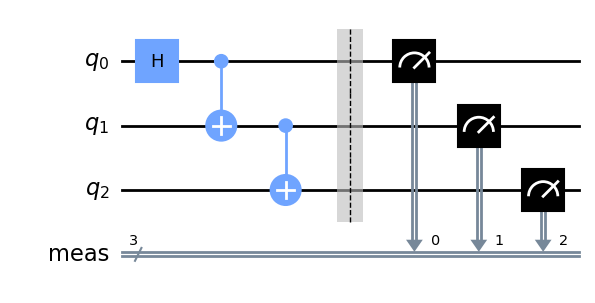

In [5]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cnot(0, 1)
circuit.cnot(1, 2)

circuit.measure_all()
circuit.draw(output='mpl')

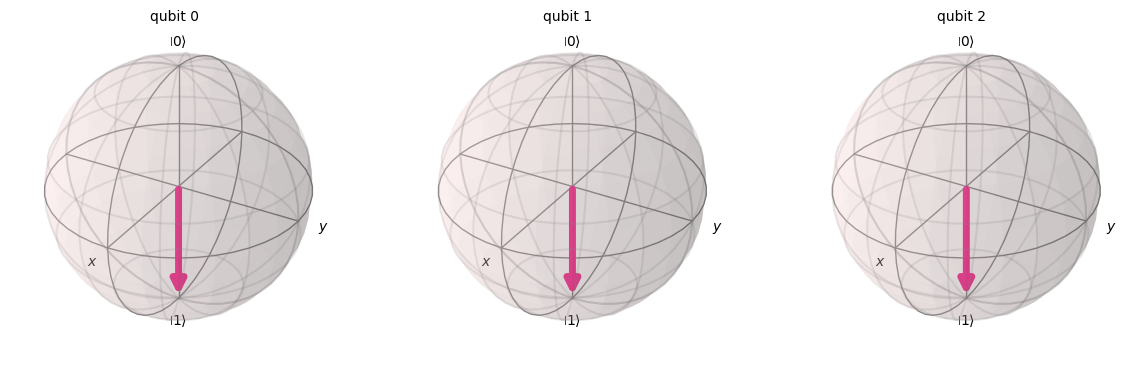

In [6]:
plot_bloch(circuit)

In [7]:
state_vector(circuit)

<IPython.core.display.Latex object>

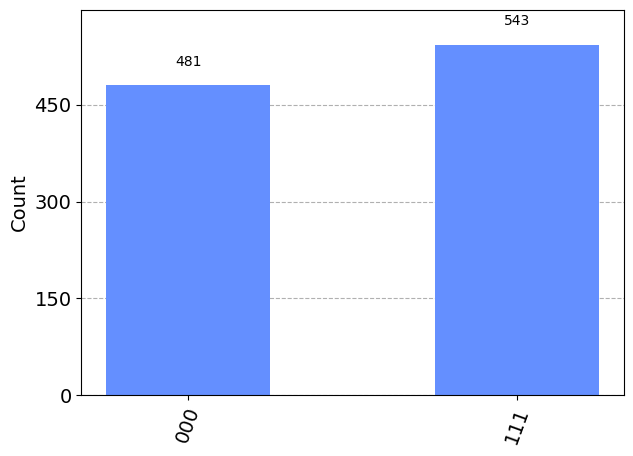

In [8]:
# Ideal simulation
aersim = AerSimulator()
result_ideal = aersim.run(circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)

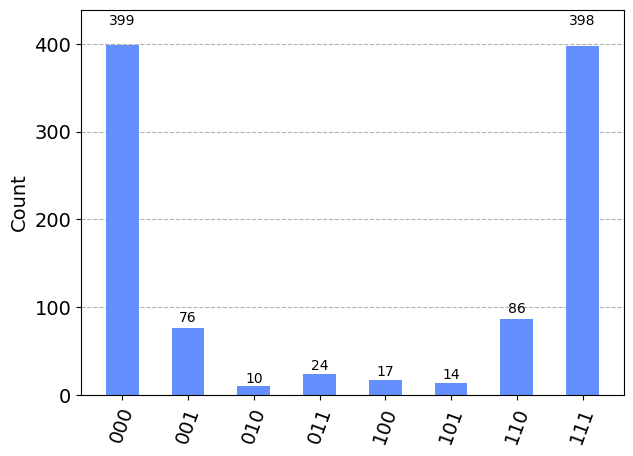

In [9]:
# Noisy simulation
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)
result_noise = aersim_backend.run(circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise)